# Dataset Description

### This Dataset Contains Two Columns

#### Category - target column having two values ham or spam
#### Message - contains email text

In [122]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [222]:
#loading the dataset
df=pd.read_csv(r"E:\deepa\internshaala _jobs\deepa\mega_mind_assignment\spam_mail\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **EDA(Exploratory Data Analysis)**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [125]:
df.shape

(5572, 2)

In [126]:
#checking the null vlaues
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [127]:
#no null vlaues

In [249]:
# Check for duplicate rows
duplicate_rows = df[df['Message'].duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

Duplicate rows found:
     Category                                            Message
103       ham  As per your request 'Melle Melle (Oru Minnamin...
154       ham  As per your request 'Melle Melle (Oru Minnamin...
207       ham  As I entered my cabin my PA said, '' Happy B'd...
223       ham                             Sorry, I'll call later
326       ham                   No calls..messages..missed calls
...       ...                                                ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...
5535      ham  I know you are thinkin malaria. But relax, chi...
5539      ham                         Just sleeping..and surfing
5553      ham                        Hahaha..use your brain dear
5558      ham                             Sorry, I'll call later

[415 rows x 2 columns]


In [129]:
#having duplicate data in message column

In [250]:
# Drop duplicate rows
df_without_duplicates = df.drop_duplicates()

In [225]:
df_without_duplicates 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [132]:
df_without_duplicates.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [133]:
df_without_duplicates.Category.unique()#checking unique values in category column

array(['ham', 'spam'], dtype=object)

In [134]:
df_without_duplicates.Category.value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

In [251]:
#encoding the category column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_without_duplicates['Category']=le.fit_transform(df_without_duplicates['Category'])
df_without_duplicates.head()

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\4249885445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_duplicates['Category']=le.fit_transform(df_without_duplicates['Category'])


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# **Data Cleaning**

In [136]:
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "soâs":"so is",
    "soâve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yesâm":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [137]:
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mfw" : "my face when",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [239]:
#function for expanding contractions
def expand_cotractions(x):
  if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
  else:
    return x

In [240]:
#fucntion for expandinf abbreations
def expand_abbreviations(sentence):
    final_words=[]
    words=sentence.split()
    final_words= [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return " ".join(final_words)

In [241]:
#function to remove punctuations and stopwords
def clean_text(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,]","",text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [242]:
cleaned1 = lambda x: clean_text(x)

In [252]:
df_without_duplicates['cleaned Message']=pd.DataFrame(df_without_duplicates['Message'].apply(cleaned1))

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\2248408406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_duplicates['cleaned Message']=pd.DataFrame(df_without_duplicates['Message'].apply(cleaned1))


In [244]:
df_without_duplicates.head()

,Category,Message,cleaned Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [253]:
df2=df_without_duplicates.drop('Message',axis=1)

In [254]:
df2

,Category,cleaned Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,time tried contact u u pound prize claim easy ...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


# **Data Visualization**

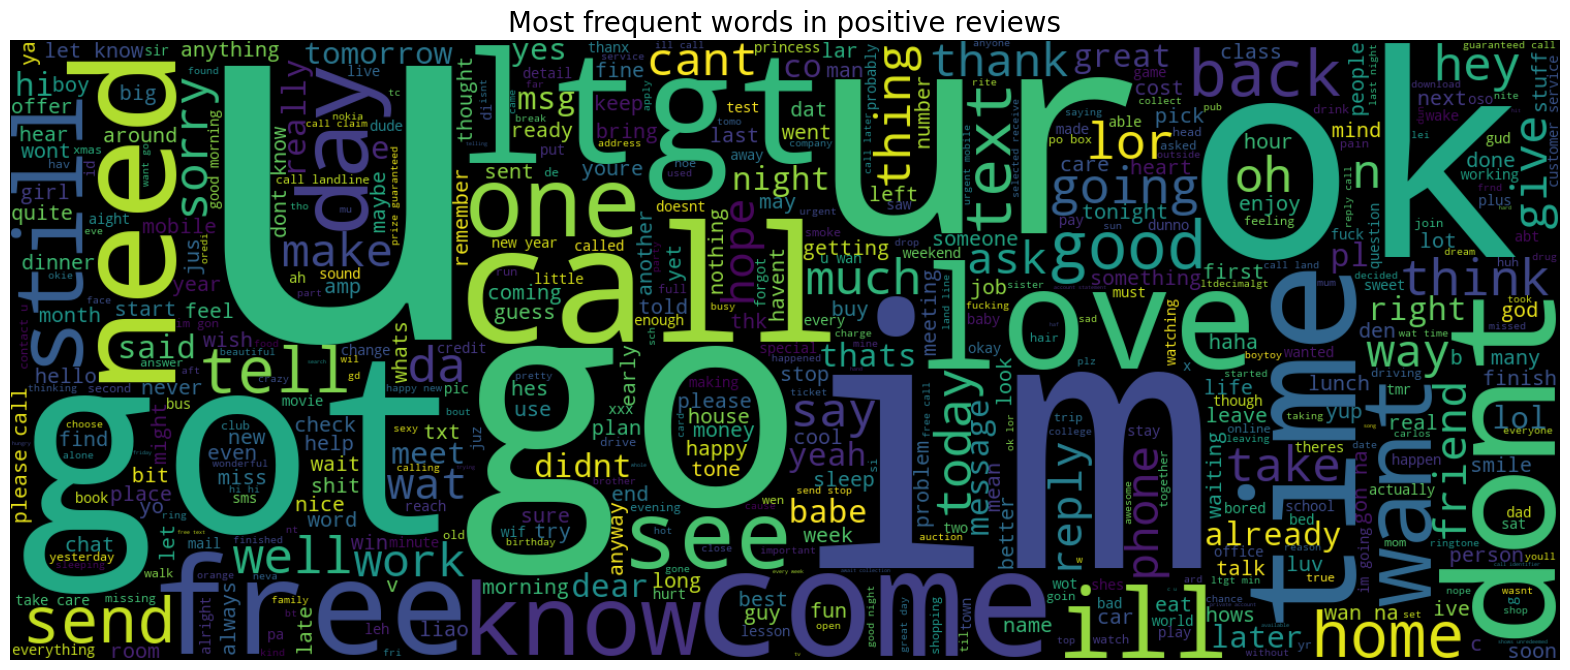

In [143]:
#plotting word cloud
text=' '.join([word for word in df_without_duplicates['cleaned Message']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1500,height=600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=20)
plt.show()

# **Data Splitting**

In [229]:
#independent and dependent variable split
x=df_without_duplicates['cleaned Message']
y=df_without_duplicates['Category']

In [145]:
#training data,tesing data split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)


In [146]:
print(x_train.shape)
print(y_train.shape)


(3609,)
(3609,)


In [147]:
print(x_test.shape)
print(y_test.shape)

(1548,)
(1548,)


# Vectorization

In [148]:
#vectorization using bag of words
bow_vec=CountVectorizer()
x_train=bow_vec.fit_transform(x_train)
x_test=bow_vec.transform(x_test)

# 1. Model Building

### 1.SVC

In [149]:
svc_clf=SVC()# Create an instance of SVC
model_svc=svc_clf.fit(x_train,y_train)# Fit the SVC model to the training data

In [150]:
y_pred_svc_1=model_svc.predict(x_test)

In [151]:
confusion_matrix(y_test,y_pred_svc_1)#confusion matrix of SVC

array([[1352,    4],
       [  48,  144]], dtype=int64)

In [152]:
accuracy_score(y_test,y_pred_svc_1)#accuracy acore for svc model

0.9664082687338501

# 2.KNN Classifier

In [153]:
metric_k= []#empty list for appending accuracy of model for each k values
neighbors = np.arange(3, 14)#k value from 3 to 14

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)# Create an instance of knn
  model2=knn.fit(x_train,y_train)# Fit the SVC model to the training data
  y_pred_knn=model2.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn) #accuracy score
  metric_k.append(acc)#appending accuracy of model for each k values

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [154]:
metric_k#accuracy array

[0.9257105943152455,
 0.91343669250646,
 0.9179586563307494,
 0.9069767441860465,
 0.911498708010336,
 0.898578811369509,
 0.900516795865633,
 0.8947028423772609,
 0.8972868217054264,
 0.8934108527131783,
 0.8940568475452196]

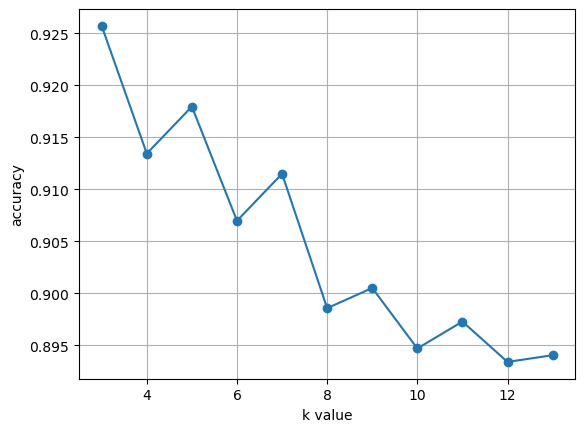

In [155]:
plt.plot(neighbors,metric_k,'o-')#plotting the accuracy for each k value
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [156]:
#accuracy is more for k=14,so creating model using k=3
knn=KNeighborsClassifier(n_neighbors=3)#confusin matrix is used for checking the accuracy ,precision ,recall etc)
model_knn=knn.fit(x_train,y_train)
y_pred_knn_1=model_knn.predict(x_test)

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [157]:
print(confusion_matrix(y_test,y_pred_knn_1))#confusin matrix is used for checking the accuracy ,precision ,recall etc

[[1354    2]
 [ 113   79]]


In [158]:
print(accuracy_score(y_test,y_pred_knn_1))#accuracy score for knn

0.9257105943152455


In [159]:
print(classification_report(y_test,y_pred_knn_1))#classification report of knn

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.98      0.41      0.58       192

    accuracy                           0.93      1548
   macro avg       0.95      0.70      0.77      1548
weighted avg       0.93      0.93      0.91      1548



# 3.Naive Bayes

In [160]:
model_gnb = GaussianNB()#instance of Gaussian NB
model_gnb.fit(x_train.toarray(),y_train)#fit on training data,toarray() is used to convert the sparse matrix to a dense array
y_pred_gnb_1= model_gnb.predict(x_test.toarray())

In [161]:
print(confusion_matrix(y_test,y_pred_gnb_1))#confusion matrix of Guassian NB

[[1189  167]
 [  26  166]]


In [162]:
print(accuracy_score(y_test,y_pred_gnb_1))#accuracy score of  Guassian NB

0.8753229974160207


In [163]:
print(classification_report(y_test,y_pred_gnb_1))# Claasification report of  Guassian NB

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      1356
           1       0.50      0.86      0.63       192

    accuracy                           0.88      1548
   macro avg       0.74      0.87      0.78      1548
weighted avg       0.92      0.88      0.89      1548



# 4.Decision Tree Classifier

In [164]:
dt_clf= DecisionTreeClassifier(random_state=42)#random state has to be given for decision trees otherwise results changes everytime while executing

In [165]:
dt_model=dt_clf.fit(x_train,y_train)#model creation
y_pred_dt_1=dt_model.predict(x_test)# y predictions

In [166]:
confusion_matrix(y_test,y_pred_dt_1)#confusion matrix of Decision tree model

array([[1331,   25],
       [  46,  146]], dtype=int64)

In [167]:
accuracy_score(y_test,y_pred_dt_1)#accuracy of decision tree model

0.9541343669250646

In [168]:
print(classification_report(y_test,y_pred_dt_1))# Claasification report of  Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1356
           1       0.85      0.76      0.80       192

    accuracy                           0.95      1548
   macro avg       0.91      0.87      0.89      1548
weighted avg       0.95      0.95      0.95      1548



# 5.Random Forest Classifier

In [169]:
rf_clf= RandomForestClassifier(random_state=42)#random state has to be given  otherwise results changes everytime while executing

In [170]:
rf_model=rf_clf.fit(x_train,y_train)#model creation

In [171]:
y_pred_rf_1=rf_model.predict(x_test)#y predictions


In [172]:
confusion_matrix(y_test,y_pred_rf_1)#confusion matrix of Random forest model

array([[1353,    3],
       [  46,  146]], dtype=int64)

In [173]:
accuracy_score(y_test,y_pred_rf_1)#accuracy of Random Forest model

0.9683462532299741

In [174]:
print(classification_report(y_test,y_pred_rf_1))# Claasification report of  Random Forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.98      0.76      0.86       192

    accuracy                           0.97      1548
   macro avg       0.97      0.88      0.92      1548
weighted avg       0.97      0.97      0.97      1548



# 6.AdaBoost Classifier

In [175]:
ada_clf = AdaBoostClassifier()#instance creation of AdaBoost Classifier
model_ada=ada_clf.fit(x_train,y_train)#model creation
y_pred_ada_1= model_ada.predict(x_test)

In [176]:
confusion_matrix(y_test,y_pred_ada_1)# confusion matrix of Ada Boost Classifier model

array([[1341,   15],
       [  42,  150]], dtype=int64)

In [177]:
accuracy_score(y_test,y_pred_ada_1)# accuracy of Ada Boost Classifier model

0.9631782945736435

In [178]:
print(classification_report(y_test,y_pred_ada_1))# Claasification report of  Ada Boost Classifier model

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.91      0.78      0.84       192

    accuracy                           0.96      1548
   macro avg       0.94      0.89      0.91      1548
weighted avg       0.96      0.96      0.96      1548



# 7.Bagging Classifier

In [179]:
bag_clf=BaggingClassifier()# instance creation of Bagging Classifier
model_bag=bag_clf.fit(x_train,y_train)# model creation
y_pred_bag_1= model_bag.predict(x_test)

In [180]:
confusion_matrix(y_test,y_pred_bag_1)# confusion matrix of Bagging Classifier model

array([[1344,   12],
       [  48,  144]], dtype=int64)

In [181]:
accuracy_score(y_test,y_pred_bag_1)# accuracy of Bagging Classifier model

0.9612403100775194

In [182]:
print(classification_report(y_test,y_pred_bag_1))# Claasification report of  Bagging Classifier model

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.92      0.75      0.83       192

    accuracy                           0.96      1548
   macro avg       0.94      0.87      0.90      1548
weighted avg       0.96      0.96      0.96      1548



 # 2. Hyper parameter Tuing of models

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 1.SVC

In [184]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf']  # Kernel type
}

In [185]:

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search.best_params_
print("Best hyperparameters:", best_params_svc)

# Get the best model
best_model_svc = grid_search.best_estimator_

# Make predictions with the best model
y_pred_svc_2 = best_model_svc.predict(x_test)

# Evaluate the best model
accuracy_svc_2 = accuracy_score(y_test, y_pred_svc_2)
print("Accuracy:", accuracy_svc_2)

Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9748062015503876


# 2.KNN Classifier

In [186]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1: Manhattan, 2: Euclidean)
}

# Initialize the KNN classifier
knn_clf= KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_
print("Best hyperparameters:", best_params_knn)

# Get the best model
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_knn_2= best_model_knn.predict(x_test)

# Evaluate the model
accuracy_knn_2 = accuracy_score(y_test, y_pred_knn_2)
print("Accuracy:", accuracy_knn_2)

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9321705426356589


# 3.Naive Bayes

In [187]:
#no hyper parameters to tune

# 4.Decision Tree Classifier

In [188]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum number of features to consider for the best split
}

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search.best_params_
print("Best hyperparameters:", best_params_dt)

# Get the best model
best_model_dt = grid_search.best_estimator_

# Make predictions with the best model
y_pred_dt_2 = best_model_dt.predict(x_test)

# Evaluate the model
accuracy_dt_2 = accuracy_score(y_test, y_pred_dt_2)
print("Accuracy:", accuracy_dt_2)

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9412144702842378


# 5.Random Forest Classifier

In [189]:
# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params_rf= grid_search.best_params_
best_model_rf= grid_search.best_estimator_



# Make predictions with the best model
y_pred_rf_2= best_model_rf.predict(x_test)
accuracy_rf_2= accuracy_score(y_test, y_pred_rf_2)
print("Accuracy:", accuracy_rf_2)


Accuracy: 0.9689922480620154


# 6.AdaBoost Classifier

In [190]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

# Initialize the base estimator (decision tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_ada = grid_search.best_params_
print("Best hyperparameters:", best_params_ada)

# Get the best model
best_model_ada = grid_search.best_estimator_

# Make predictions with the best model
y_pred_ada_2 = best_model_ada.predict(x_test)

# Evaluate the model
accuracy_ada_2 = accuracy_score(y_test, y_pred_ada_2)
print("Accuracy:", accuracy_ada_2)

Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 100}
Accuracy: 0.9689922480620154


# 7.Bagging Classifier

In [191]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators (decision trees)
    'max_samples': [0.5, 0.7, 1.0],  # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0]  # Number of features to draw from X to train each base estimator
}

# Initialize the base estimator (decision tree)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize the Bagging classifier
bagg_clf= BaggingClassifier(base_estimator=base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagg_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_clf = grid_search.best_params_
print("Best hyperparameters:", best_params_clf)

# Get the best model
best_model_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_bagg_2 = best_model_clf.predict(x_test)

# Evaluate the model
accuracy_bagg_2 = accuracy_score(y_test, y_pred_bagg_2)
print("Accuracy:", accuracy_bagg_2)

Best hyperparameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy: 0.936046511627907


# 3. Stemming and Hyper parameter tuning

In [192]:
#import nltk 
import nltk
from nltk.stem import SnowballStemmer #importing snowball stemmer

# Initialize the Snowball Stemmer for English
snowball_stemmer = SnowballStemmer(language='english')






In [193]:
# Function to perform stemming on a single sentence
def stem_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Apply stemming to each word
    stemmed_words = [snowball_stemmer.stem(word) for word in words]
    # Join the stemmed words back into a sentence
    stemmed_sentence = ' '.join(stemmed_words)
    return stemmed_sentence


In [194]:
stemmed = lambda x: stem_sentence(x)

In [195]:
df_stem=df_without_duplicates

In [196]:
df_stem.head()

,Category,Message,cleaned Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [197]:
df_stem['stemmed Message']=pd.DataFrame(df_stem['cleaned Message'].apply(stemmed))#applying the fucntion on the messgae column

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\3521420687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stem['stemmed Message']=pd.DataFrame(df_stem['cleaned Message'].apply(stemmed))#applying the fucntion on the messgae column


In [198]:
df_stem.head()

,Category,Message,cleaned Message,stemmed Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,free entri wkli comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though


In [199]:
df_stem.drop(['Message','cleaned Message'],inplace=True,axis=1)# dropping the cleaned message column

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\2252388328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stem.drop(['Message','cleaned Message'],inplace=True,axis=1)# dropping the cleaned message column


In [200]:
df_stem.head()

,Category,stemmed Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkts may...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [201]:
df_stem['Category']=le.fit_transform(df_stem['Category'])# label encoding the category column
df_stem.head()

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\1072149545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stem['Category']=le.fit_transform(df_stem['Category'])# label encoding the category column


,Category,stemmed Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkts may...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [202]:
df_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5157 non-null   int64 
 1   stemmed Message  5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [203]:
df_stem.dropna(inplace=True)#dropping the null values

C:\Users\sreed\AppData\Local\Temp\ipykernel_22196\4161470769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stem.dropna(inplace=True)#dropping the null values


In [204]:
df_stem.isnull().sum()

Category           0
stemmed Message    0
dtype: int64

# Data splitting

In [205]:
x=df_stem['stemmed Message']# independent column
y=df_stem['Category']# dependent / target column

In [206]:
# training data , testing data split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3609,)
(3609,)
(1548,)
(1548,)


# Vectorization of stemmed messages

In [207]:
#vecotirzation using Bag of words(BOW)
bow_vec=CountVectorizer()
x_train=bow_vec.fit_transform(x_train)
x_test=bow_vec.transform(x_test)

# Model building using Stemmed data

# 1.SVC

In [208]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf']  # Kernel type
}

In [209]:

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search.best_params_
print("Best hyperparameters:", best_params_svc)

# Get the best model
best_model_svc = grid_search.best_estimator_

# Make predictions with the best model
y_pred_svc_3 = best_model_svc.predict(x_test)

# Evaluate the best model
accuracy_svc_3 = accuracy_score(y_test, y_pred_svc_3)
print("Accuracy:", accuracy_svc_3)

Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.9825581395348837


# 2.KNN Classifier

In [210]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1: Manhattan, 2: Euclidean)
}

# Initialize the KNN classifier
knn_clf= KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_
print("Best hyperparameters:", best_params_knn)

# Get the best model
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_knn_3 = best_model_knn.predict(x_test)

# Evaluate the model
accuracy_knn_3 = accuracy_score(y_test, y_pred_knn_3)
print("Accuracy:", accuracy_knn_3)

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9354005167958657


# 3.Naive Bayes

In [211]:
model_gnb = GaussianNB()
model_gnb.fit(x_train.toarray(),y_train)
y_pred_gnb_3= model_gnb.predict(x_test.toarray())

In [212]:
print(confusion_matrix(y_test,y_pred_gnb_3))

[[1173  183]
 [  30  162]]


In [213]:
print(accuracy_score(y_test,y_pred_gnb_3))

0.8624031007751938


In [214]:
print(classification_report(y_test,y_pred_gnb_3))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1356
           1       0.47      0.84      0.60       192

    accuracy                           0.86      1548
   macro avg       0.72      0.85      0.76      1548
weighted avg       0.91      0.86      0.88      1548



# 4.Decision Tree Classifier

In [215]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum number of features to consider for the best split
}

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search.best_params_
print("Best hyperparameters:", best_params_dt)

# Get the best model
best_model_dt = grid_search.best_estimator_

# Make predictions with the best model
y_pred_dt_3 = best_model_dt.predict(x_test)

# Evaluate the model
accuracy_dt_3 = accuracy_score(y_test, y_pred_dt_3)
print("Accuracy:", accuracy_dt_3)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9483204134366925


# 5.Random Forest Classifier

In [216]:
# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params_rf= grid_search.best_params_
best_model_rf= grid_search.best_estimator_

# Evaluate on test set
test_score = best_model_rf.score(x_test, y_test)
print("Best Hyperparameters:", best_params_rf)
print("Test Set Accuracy:", test_score)# Evaluate the best model

# Make predictions with the best model
y_pred_rf_3 = best_model_rf.predict(x_test)
accuracy_rf_3= accuracy_score(y_test, y_pred_rf_3)
print("Accuracy:", accuracy_rf_3)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Accuracy: 0.9702842377260982
Accuracy: 0.9702842377260982


# 6.AdaBoost Classifier

In [217]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

# Initialize the base estimator (decision tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_ada = grid_search.best_params_
print("Best hyperparameters:", best_params_ada)

# Get the best model
best_model_ada = grid_search.best_estimator_

# Make predictions with the best model
y_pred_ada_3 = best_model_ada.predict(x_test)

# Evaluate the model
accuracy_ada_3 = accuracy_score(y_test, y_pred_ada_3)
print("Accuracy:", accuracy_ada_3)

Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.9657622739018088


# 7.Bagging Classifier

In [218]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators (decision trees)
    'max_samples': [0.5, 0.7, 1.0],  # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0]  # Number of features to draw from X to train each base estimator
}

# Initialize the base estimator (decision tree)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize the Bagging classifier
bagg_clf= BaggingClassifier(base_estimator=base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagg_clf, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_clf = grid_search.best_params_
print("Best hyperparameters:", best_params_clf)

# Get the best model
best_model_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_bagg_3 = best_model_clf.predict(x_test)

# Evaluate the model
accuracy_bagg_3 = accuracy_score(y_test, y_pred_bagg_3)
print("Accuracy:", accuracy_bagg_3)

Best hyperparameters: {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 100}
Accuracy: 0.9405684754521964


# Research gap filling

# 4.  LSTM model

In [219]:
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Embedding,Flatten,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential


In [293]:
#independent and dependent variable split
x=df2['cleaned Message']
y=df2['Category'].values

In [311]:
tokenizer = Tokenizer(num_words=5000, split=' ')# Initialize a Tokenizer with a vocabulary size of 5000
tokenizer.fit_on_texts(df2['cleaned Message'])# Fit the Tokenizer on the 'text' column of the DataFrame 'data',This step builds the vocabulary based on the text data.

X = tokenizer.texts_to_sequences(df2['cleaned Message'])# Convert the text data to sequences using the fitted Tokenizer,Each word in the text is replaced with its corresponding integer index from the vocabulary.
print("X \n" ,X)

X 
 [[7, 3333, 593, 528, 564, 971, 40, 54, 341, 972, 75, 2264, 973, 10, 3334, 64], [9, 189, 1110, 301, 1, 1460], [12, 391, 804, 805, 132, 2265, 974, 565, 2266, 169, 21, 2265, 243, 391, 3335, 33, 3336, 313], [1, 127, 74, 224, 2267, 1, 87, 66, 74], [737, 6, 35, 314, 680, 1461, 108, 315], [632, 48, 1259, 465, 261, 30, 244, 13, 262, 29, 1462, 9, 225, 1111, 3337, 22, 2268], [123, 466, 13, 263, 495, 13, 3338, 3339], [147, 1260, 2269, 2269, 2270, 3340, 3341, 3342, 467, 1463, 2271, 1112, 1113, 162, 1463], [594, 884, 316, 161, 342, 3343, 80, 975, 63, 2, 63, 302, 410, 446], [46, 633, 1, 32, 1261, 468, 245, 496, 806, 326, 12, 2, 46, 468, 1752, 12], [3, 115, 53, 27, 126, 6, 18, 166, 170, 885, 110, 96, 82, 3344, 303, 36], [1753, 3345, 132, 106, 497, 33, 22, 226, 3346, 313, 37, 1754, 807], [117, 56, 12, 2272, 80, 3347, 33, 261, 63, 447, 3348, 3349, 681], [82, 1464, 76, 428, 287, 3350, 808, 130, 44, 150, 3351, 3352, 808, 498, 2273, 343], [469, 886], [3353, 179, 566, 976, 809, 738, 107, 33, 100, 976, 

In [313]:

maxlen = 45# Set the maximum length of sequences
vocab_size = len(tokenizer.word_index)+1# Get the vocabulary size from the fitted Tokenizer
X = pad_sequences(X,padding='post',maxlen=maxlen)# Pad the sequences to the specified maximum length
X#independent variable

array([[   7, 3333,  593, ...,    0,    0,    0],
       [   9,  189, 1110, ...,    0,    0,    0],
       [  12,  391,  804, ...,    0,    0,    0],
       ...,
       [1433,    0,    0, ...,    0,    0,    0],
       [ 355, 3303,   13, ...,    0,    0,    0],
       [2022,  400,  186, ...,    0,    0,    0]])

In [314]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3609, 45)
(3609,)
(1548, 45)
(1548,)


In [309]:
EMBEDDING_SIZE = 128#Specifies the size or dimensionality of word embeddings
HIDDEN_LAYER_SIZE = 64#Indicates the number of neurons or units in hidden layers of a neural network
BATCH_SIZE = 32
NUM_EPOCHS = 10
MAX_sentense_len=45

In [315]:
import tensorflow as tf

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=MAX_sentense_len))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



# Train the model on new data
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20
113/113 [==============================] - 8s 43ms/step - loss: 0.3950 - accuracy: 0.8756 - val_loss: 0.2239 - val_accuracy: 0.8760
Epoch 2/20
113/113 [==============================] - 4s 37ms/step - loss: 0.1446 - accuracy: 0.9631 - val_loss: 0.1383 - val_accuracy: 0.9690
Epoch 3/20
113/113 [==============================] - 4s 35ms/step - loss: 0.0911 - accuracy: 0.9817 - val_loss: 0.1349 - val_accuracy: 0.9722
Epoch 4/20
113/113 [==============================] - 4s 38ms/step - loss: 0.1192 - accuracy: 0.9737 - val_loss: 0.1658 - val_accuracy: 0.9651
Epoch 5/20
113/113 [==============================] - 5s 41ms/step - loss: 0.0978 - accuracy: 0.9806 - val_loss: 0.1332 - val_accuracy: 0.9716
Epoch 6/20
113/113 [==============================] - 5s 41ms/step - loss: 0.0679 - accuracy: 0.9873 - val_loss: 0.1717 - val_accuracy: 0.9651
Epoch 7/20
113/113 [==============================] - 5s 43ms/step - loss: 0.0549 - accuracy: 0.9903 - val_loss: 0.1542 - val_accuracy: 0.9683

# Evaluation Step

In [316]:
loss,acc =  model.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

49/49 [==============================] - 1s 10ms/step - loss: 0.1813 - accuracy: 0.9645
testing accuracy 96.4%


# Conclusion

### Performance comparison of models using default parameters

In [317]:
print('The accuracy score of model SVC is: ',accuracy_score(y_test,y_pred_svc_1))#accuracy acore for svc model
print('The accuracy score of model KNN is: ',accuracy_score(y_test,y_pred_knn_1))#accuracy score for knn
print('The accuracy score of model is: ',accuracy_score(y_test,y_pred_gnb_1))#accuracy score of  Guassian NB
print('The accuracy score of model is: ',accuracy_score(y_test,y_pred_dt_1))#accuracy of decision tree model
print('The accuracy score of model is: ',accuracy_score(y_test,y_pred_rf_1))#accuracy of Random Forest model
print('The accuracy score of model is: ',accuracy_score(y_test,y_pred_ada_1))# accuracy of Ada Boost Classifier model
print('The accuracy score of model is: ',accuracy_score(y_test,y_pred_bag_1))# accuracy of Bagging Classifier model

The accuracy score of model SVC is:  0.9664082687338501
The accuracy score of model KNN is:  0.9257105943152455
The accuracy score of model is:  0.8753229974160207
The accuracy score of model is:  0.9541343669250646
The accuracy score of model is:  0.9683462532299741
The accuracy score of model is:  0.9631782945736435
The accuracy score of model is:  0.9612403100775194


### Performance comparison of models using Hyper parameter Tuning

In [318]:
# Evaluate the best model
accuracy_svc_2 = accuracy_score(y_test, y_pred_svc_2)
print("Accuracy score of SVC model:", accuracy_svc_2)
# Evaluate the model
accuracy_knn_2 = accuracy_score(y_test, y_pred_knn_2)
print("Accuracy score of KNN model:", accuracy_knn_2)
# Evaluate the model
accuracy_dt_2 = accuracy_score(y_test, y_pred_dt_2)
print("Accuracy score of Decision Tree model:", accuracy_dt_2)
accuracy_rf_2 = accuracy_score(y_test, y_pred_rf_2)
print("Accuracy score of Random Forest model:", accuracy_rf_2)
# Evaluate the model
accuracy_ada_2 = accuracy_score(y_test, y_pred_ada_2)
print("Accuracy score of Ada Boost model:", accuracy_ada_2)
# Evaluate the model
accuracy_bagg_2 = accuracy_score(y_test, y_pred_bagg_2)
print("Accuracy score of Bagging Classifier model:", accuracy_bagg_2)

Accuracy score of SVC model: 0.9748062015503876
Accuracy score of KNN model: 0.9321705426356589
Accuracy score of Decision Tree model: 0.9412144702842378
Accuracy score of Random Forest model: 0.9689922480620154
Accuracy score of Ada Boost model: 0.9689922480620154
Accuracy score of Bagging Classifier model: 0.936046511627907


### Performance comparison of models on stemmed data and Hyper parameter Tuning

In [320]:
# Evaluate the best model
accuracy_svc_3= accuracy_score(y_test, y_pred_svc_3)
print("Accuracy of SVC model:", accuracy_svc_3)
# Evaluate the model
accuracy_knn_3 = accuracy_score(y_test, y_pred_knn_3)
print("Accuracy score of KNN model:", accuracy_knn_3)
print("Accuracy score of GaussianNB model:",accuracy_score(y_test,y_pred_gnb_3))
# Evaluate the model
accuracy_dt_3 = accuracy_score(y_test, y_pred_dt_3)
print("Accuracy score of Decision Tree model:", accuracy_dt_3)
accuracy_rf_3= accuracy_score(y_test, y_pred_rf_3)
print("Accuracy score of Random Forest model:", accuracy_rf_3)
# Evaluate the model
accuracy_ada_3 = accuracy_score(y_test, y_pred_ada_3)
print("Accuracy score of Ada Boost model:", accuracy_ada_3)
# Evaluate the model
accuracy_bagg_3 = accuracy_score(y_test, y_pred_bagg_3)
print("Accuracy score of Bagging Classifier model:", accuracy_bagg_3)

Accuracy of SVC model: 0.9825581395348837
Accuracy score of KNN model: 0.9354005167958657
Accuracy score of GaussianNB model: 0.8624031007751938
Accuracy score of Decision Tree model: 0.9483204134366925
Accuracy score of Random Forest model: 0.9702842377260982
Accuracy score of Ada Boost model: 0.9657622739018088
Accuracy score of Bagging Classifier model: 0.9405684754521964


### Performance of LSTM model

In [319]:
print('Accuracy of LSTM model is  %.1f%%'%(100*acc))

Accuracy of LSTM model is  96.4%
